# Polynya model #

Pease, C. H. (1987), The size of wind-driven coastal polynyas, J. Geophys. Res., 92(C7), 7049–7059, doi:10.1029/JC092iC07p07049.

<img src='pease_polynya.png'> 

## Introduction ##

Idea of Lebedev (1968)

 * Wind generated coastal polynyas attain a maximum size
 * Total frazil ice production is area dependend
 * Steady state balance of ice production with advection of the solidified ice from the shore

## Basic assumption ##

Change in polynya width with time

$$\frac{dX_p}{dt}=V_i-\frac{X_pF_i}{H_i}$$

 * Polynya width $X_p$ [m]
 * Advection rate of ice from the shore $V_i$ [m/s]
 * Ice production rate $F_i$ [m/s]
 * Collection depth (thickness) of grease ice or nilas $H_i$ [m] parameter $H_i\approx0.1$m

## Solution of differential equation ##

$$X_p=\frac{V_i H_i}{F_i}(1-\exp(-t \frac{F_i}{H_i}))$$

 * $X_p$(maximum)=$\frac{V_i H_i}{F_i}$ for large $t$
 * Time scale for reaching 95% of limiting size $t_{95\%} =3.0 \frac{H_i}{F_i}$ 

## Freezing rate from surface energy balance ##

Freezing rate $F_i=\frac{dH}{dt}$ from surface energy budget

$$-\rho_iL\frac{dH}{dt}=(1-a)Q_r+Q_{ld}-Q_{lu}+Q_s+Q_e$$

 * Unreflected shortwave radiation $(1-a)Q_r$
 * Downward $Q_{ld}$ and upward $Q_{lu}$ longwave radiation 
 * Sensible or turbulent heat flux $Q_s$
 * Latent heat of evaporation $Q_e$
 * Density of young sea ice $\rho_i\approx950$ kg m$^{-3}$
 * Latent heat of freezing for salt water $L\approx 330$ J g$^{-1}$ 

Upward longwave radiation $Q_{lu}$

$$Q_{lu}=\sigma e_w T_w^4$$

 * Stefan-Boltzmann constant $\sigma=5.67$ 10$^{-8}$ W/m$^2$K$^4$
 * Water emissivity $e_w\approx0.98$
 * Water temperature $T_w=-1.8^\circ$C
 * Constant upward longwave radiation $Q_{lu}\approx301$Wm$^{-2}$ 

Downward longwave radiation $Q_{ld}$

$$Q_{ld}=\sigma e_a T_a^4$$

 * Air effective emissivity $e_a$
 * Air temperature $T_a$

Sensible heat flux

$$Q_s=\rho_a C_h C_p V_a (T_a-T_w)$$

Evaporative heat flux

$$Q_e=\rho_a C_e L_e V_a(q_a-q_s)$$

 * Density of cold air $\rho_a\approx1.3$ kg m$^{-3}$
 * Wind speed $V_a$ at reference height, typically 10m
 * Temperature at reference height (10m) $T_a$ and surface $T_w$
 * Specific humidities  at reference height $q_a$ and surface $q_s$
 * Specific heat of the air $C_p=1004$ J K$^{-1}$ kg$^{-1}$
 * Latent heat of evaporation $L_e$
 * Bulk transfer coefficients $C_e \approx C_h \approx 2 \times 10^{-3}$ 

## Simplified model ##

$$F_i=\frac{-1}{\rho_i L} [\sigma e_a T_a^4-Q_{lu}+\rho_a C_h C_p V_a (T_a-T_w)]$$
 
 * Neglected evaporative flux
 * Constant  effective emissivity of air $e_a=0.95$ (higher than recommended)
 * Ice drift $V_i$ assumed to be 3% of wind speed

# Conclusions #
 * Balance between advection of sea ice away from the coast and area averaged ice production rate
 * Polynya size strongly depends on air temperature
 * Polynya size only moderately depends on wind speeds for winds greater than 10 m/s
 * Contribution of heat from the coastal ocean to the winter atmosphere is a self-limiting process
 * $H_i$ is a parameter (constant) of the model


# Code #

## Simplified model ##

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
def Freezing_rate(T_a,V_a):
    """Eq. (9) of Pease (1987)
    Input T_a: air temperature in deg C
    Input V_a: wind speed in m/s
    """
    return -1.0/(rho_i*L)*(sig*ema*T_a**4.0-Q_lu+rho_a*C_h*C_p*V_a*(T_a-T_w))

# Constants
sig=5.67e-8 # W/mK**4 Boltzmann
e_w=0.98 # Water thermal emissivity
T_abs=273.16 # K
L=3.34e5 # J/kg Latent heat of fusion
T_w=T_abs-1.8 # Water temperature
rho_i=950.0 # kg/m**3 young ice density
rho_a=001.3 # kg/m**3 cold air density
ema=0.95 # Effective emissivity of atmosphere
C_h=2e-3 # sensible heat coefficient
C_p=1004.0 # J/deg kg specific heat of air
Q_lu=sig*e_w*T_w**4 # Longwave upwelling radiation W/m**2

Populating the interactive namespace from numpy and matplotlib


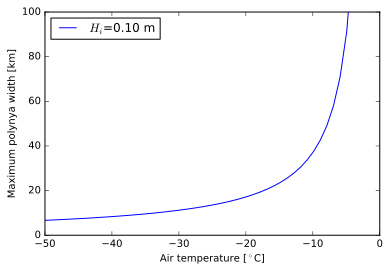

In [2]:
V_a=10.0 # m/s Wind speed
H_i=0.1 # Collection depth

V_i=0.03 * V_a # Ice drift 3% of wind speed
T_a=T_abs+linspace(-50,-2)
F_i=Freezing_rate(T_a,V_a)
X_max=V_i*H_i/F_i

plot(T_a-T_abs,X_max/1e3,label=r'$H_i$=%.2f m'%H_i)
axis([-50,0,0,100])
xlabel('Air temperature [$^\circ$C]')
ylabel('Maximum polynya width [km]')
legend(loc=2)

[0, 50, 0, 100]

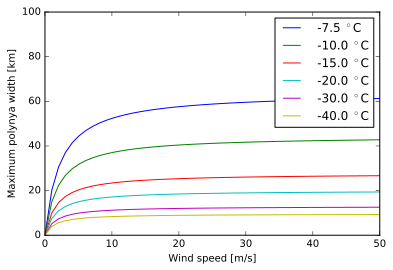

In [3]:
H_i=0.1
figure(2)
for T_a in [-7.5,-10.0,-15.0,-20.0,-30.0,-40.0]:
    V_a=linspace(0,50)
    V_i=0.03 * V_a
    F_i=Freezing_rate(T_a+T_abs,V_a)
    X_max=V_i*H_i/F_i
    plot(V_a,X_max/1e3,label=' %2.1f $^\circ$C'%T_a)
legend()
xlabel('Wind speed [m/s]')
ylabel('Maximum polynya width [km]')
axis([0,50,0,100])

[-50, 0, 0, 100]

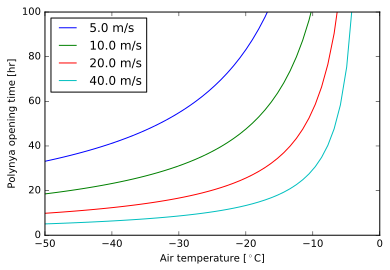

In [4]:
for V_a in [5.0,10.0,20.0,40.0]:
    T_a=linspace(-50,-4)+T_abs
    F_i=Freezing_rate(T_a,V_a)
    t_95=log(20.0)*H_i/F_i/(60*60)
    plot(T_a-T_abs,t_95,label=str(V_a)+' m/s')
legend(loc=2)
xlabel('Air temperature [$^\circ$C]')
ylabel('Polynya opening time [hr]')
axis([-50,0,0,100])

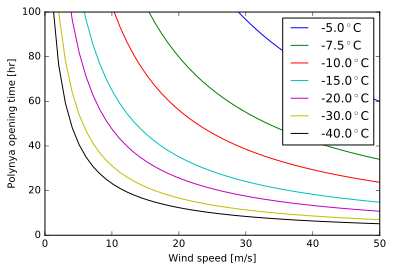

In [5]:
for T_a in [-5.0,-7.5,-10.0,-15.0,-20.0,-30.0,-40.0]:
    V_a=linspace(0,50)
    F_i=Freezing_rate(T_a+T_abs,V_a)
    t_95=log(20.0)*H_i/F_i/(60*60)
    plot(V_a,t_95,label=str(T_a)+'$^\circ$C')
axis([0,50,0,100])
legend()
xlabel('Wind speed [m/s]')
ylabel('Polynya opening time [hr]')


## Using Sympy to verify ODE solution ##

ODE given in Pease (1987)

$$\frac{dX_p}{dt}=V_i-\frac{X_pF_i}{H_i}$$


In [6]:
from sympy import *
init_printing()

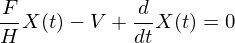

In [7]:
# Declare symbols and functions
t= Symbol('t')
F= Symbol('F')
H= Symbol('H')
V= Symbol('V')
C= Symbol('C')
C1= Symbol('C1')
X = Function('X')

# Declare equation
eq1=Eq(Derivative(X(t), t) + X(t)*F/H-V)
eq1

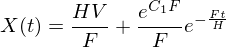

In [8]:
# Solve differential equation
sol=dsolve(eq1,X(t))
sol.expand()

Compare with solution given in Pease(1987)
$$X_p=\frac{V_i H_i}{F_i}(1-\exp(-t \frac{F_i}{H_i}))$$


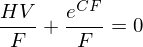

In [9]:
# Expression of coefficient with C1 
eq2=Eq(exp(C*F)/F+H*V/F)
eq2

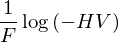

In [10]:
# Solve for constant C
C_sol=solve(eq2,C)
C_sol[0]

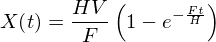

In [11]:
simplify(sol.subs(C1,C_sol[0])) # Substituiere C1 mit gefundener Lösung C 

Correct! We've verified the solution of Pease (1987).